In [1]:
import numpy as np


from scipy.stats import gaussian_kde as kde
from scipy.stats import loguniform, uniform

import scipy.integrate as integrate
import scipy.optimize as optimize


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


from classy import Class

import time

In [2]:
comon_params={'omega_b':0.0243828,'omega_cdm':0.1201075,'T_cmb':2.7255,'h':0.67810,'tau_reio':0.05430842,
            'N_ur':3.0,'A_s' : 2.100549e-09,'output':'mTk,dTk,tCl,mPk','P_k_max_h/Mpc':1.,'k_output_values':10}

In [14]:
cosmos=[]

cosmo1=Class()

cosmo1.set(comon_params)
cosmo1.set({'ic':'vid','vid_phi':0,'vid_sin_theta':0.0})

tstart=time.perf_counter()
cosmo1.compute()
print(time.perf_counter()-tstart)

cosmo2=Class()

cosmo2.set(comon_params)
cosmo2.set({'ic':'cdi'})

tstart=time.perf_counter()
cosmo2.compute()
print(time.perf_counter()-tstart)

cosmos.append([r'CDI, $\phi=0$',cosmo1,cosmo2])



0.9613595779810566
0.9401970500184689


In [15]:


cosmo1=Class()

cosmo1.set(comon_params)
cosmo1.set({'A_s':comon_params['A_s']*(comon_params['omega_b']/comon_params['omega_cdm'])**2})
cosmo1.set({'ic':'vid','vid_phi':0.,'vid_sin_theta':0.0})

tstart=time.perf_counter()
cosmo1.compute()
print(time.perf_counter()-tstart)

cosmo2=Class()

cosmo2.set(comon_params)
cosmo2.set({'ic':'bi'})

tstart=time.perf_counter()
cosmo2.compute()
print(time.perf_counter()-tstart)

cosmos.append([r'BI, $\phi=0$+normalization',cosmo1,cosmo2])

1.1356610319926403
0.9506315840117168


In [16]:


cosmo1=Class()

Og=cosmo2.Omega_g()
Onu=cosmo2.Omega_r()-Og
Ob=cosmo2.Omega_b()
Ocdm=cosmo2.Omega0_cdm()

fnid=3/4*Onu/Og*(1+Og/Onu)
fcdi=3/4*Onu/Og*(1+Ob/Ocdm)

cosmo1.set(comon_params)
cosmo1.set({'A_s':comon_params['A_s']*(fnid**2+fcdi**2)})
cosmo1.set({'ic':'vid','vid_phi':np.arctan(fnid/fcdi),'vid_sin_theta':0.0})

tstart=time.perf_counter()
cosmo1.compute()
print(time.perf_counter()-tstart)

cosmo2=Class()

cosmo2.set(comon_params)
cosmo2.set({'ic':'nid'})

tstart=time.perf_counter()
cosmo2.compute()
print(time.perf_counter()-tstart)

cosmos.append([r'CNID, $\phi=\pi\cdot$'+str(np.arctan(fnid/fcdi)/np.pi)+'+normalization',cosmo1,cosmo2])

1.0457490739936475
1.118267044017557


In [17]:


cosmo1=Class()


cosmo1.set(comon_params)
cosmo1.set({'A_s':comon_params['A_s']})
cosmo1.set({'ic':'vid','vid_phi':np.pi/2,'vid_sin_theta':0.0})

tstart=time.perf_counter()
cosmo1.compute()
print(time.perf_counter()-tstart)


cosmos.append([r'NID, $\phi=\pi/2$',cosmo1])

0.9640338509925641


In [18]:
cosmo1=Class()


cosmo1.set(comon_params)
cosmo1.set({'N_ur':3.3})
cosmo1.set({'ic':'vid','vid_phi':np.pi/2,'vid_phi':np.arctan(0.3/3)})

tstart=time.perf_counter()
cosmo1.compute()
print(time.perf_counter()-tstart)


cosmos.append([r'dark NID, $sin(\theta)=\pi\cdot$'+str(np.arctan(0.3/3)/np.pi)+r', $\Delta N_{eff}=0.3$',cosmo1])

1.112084919004701


In [19]:
cosmo1=Class()


cosmo1.set(comon_params)
cosmo1.set({'N_idr':0.3,'idr_nature':'fluid'})
cosmo1.set({'ic':'vid','vid_phi':np.pi/2,'vid_sin_theta':1.0})

tstart=time.perf_counter()
cosmo1.compute()
print(time.perf_counter()-tstart)


cosmos.append([r'IDRID, $sin(\theta)=1$ + $N_{idr}=0.3$',cosmo1])

1.3010308670054656


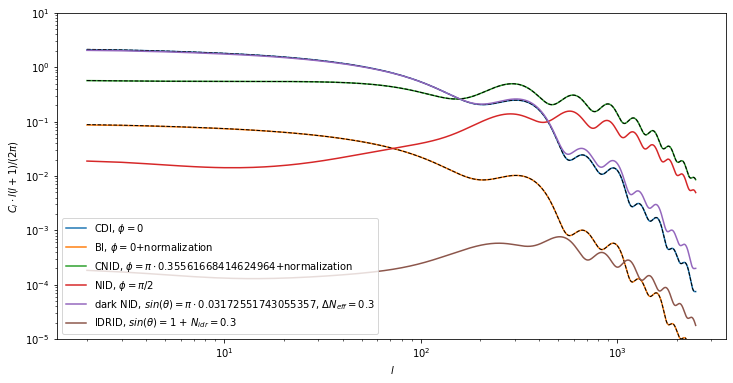

In [22]:
fig=plt.figure(1, figsize=(12,6))
ax=fig.add_subplot(111)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log")
ax.set_xlabel(r" $l$")
ax.set_ylabel(r"$C_l \cdot l(l+1)/(2\pi)$")

#ax.set_xlim(1e-1,1e2)

ax.set_ylim(1e-5,10)




ell=cosmo1.raw_cl()['ell'][2:]
factor = 1.e10*ell*(ell+1.)/2./np.pi

for INI in cosmos:
    

    ax.plot(ell,INI[1].raw_cl()['tt'][2:]*factor,label=INI[0])
    if len(INI)==3:
        ax.plot(ell,INI[2].raw_cl()['tt'][2:]*factor,color='black',ls='--',linewidth=1)

        
#ax.plot(ell,INI[1].raw_cl()['tt'][2:]*factor*10**2,label=INI[0])

ax.legend()
    
plt.show()


In [72]:
one_k1=cosmo1.get_perturbations()['scalar'][0]

one_k3=cosmo3.get_perturbations()['scalar'][0]

In [73]:
one_k3['delta_g']

array([-6.80765525e-01, -6.80765525e-01, -6.80765525e-01, ...,
        1.11543332e-07, -7.76816603e-07, -9.61127511e-07])

In [74]:
one_k1['delta_g']

array([-4.85273153e-01, -4.85273153e-01, -4.85273153e-01, ...,
        5.41471145e-07, -7.95781555e-08, -6.85225401e-07])

In [75]:
one_k1.keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])

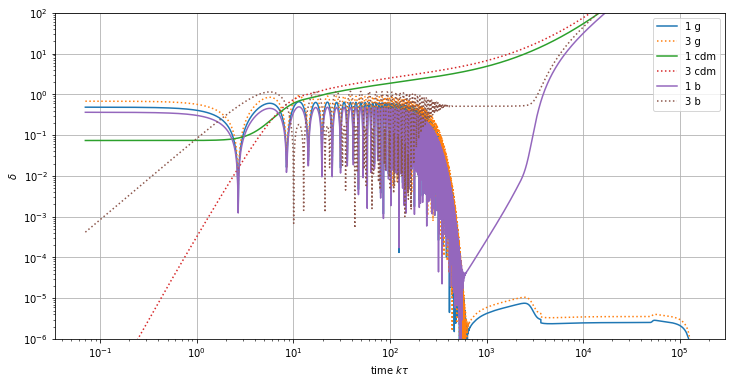

In [77]:
fig=plt.figure(1, figsize=(12,6))
ax=fig.add_subplot(111)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log")
ax.set_xlabel(r"time $k\tau$")
ax.set_ylabel(r"$\delta$")

#ax.set_xlim(1e-1,1e2)

ax.set_ylim(1e-6,100)

ax.grid()

tvar1=one_k1['tau [Mpc]']*10
tvar3=one_k3['tau [Mpc]']*10
#tvar=one_k1['a']

#ax.plot(one_k['tau [Mpc]'],one_k['delta_g'],label='photon')
ax.plot(tvar1,abs(one_k1['delta_g']),label='1 g')
ax.plot(tvar3,abs(one_k3['delta_g']),label='3 g',ls=':')

ax.plot(tvar1,one_k1['delta_cdm'],label='1 cdm')
ax.plot(tvar3,one_k3['delta_cdm'],label='3 cdm',ls=':')

ax.plot(tvar1,abs(one_k1['delta_b']),label='1 b')
ax.plot(tvar3,abs(one_k3['delta_b']),label='3 b',ls=':')
#ax.plot(tvar,one_k1['theta_g'],label='nid shear ur')

#ax.plot(tvar,one_k1['theta_idr'],label='nid shear idr')
#ax.plot(tvar,one_k1['l3_ur'],label='nid shear ur')
#ax.plot(tvar,one_k1['delta_g'],label='nid g')
#ax.plot(tvar,one_k1['delta_b'],label='nid b')
#ax.plot(tvar,one_k1['delta_cdm'],label='nid cdm')
#ax.plot(tvar,one_k1['phi'],label='nid phi')
#ax.plot(tvar, one_k1['psi'],label='nid psi')

#ax.plot(tvar,10*(one_k1['phi']+one_k1['psi']),label='nid phi+psi')

#ax.plot(tvar,3/4*(one_k1['delta_ur']-one_k1['delta_g']),label=r'$S_{\gamma\nu}$')
#ax.plot(one_k2['a'],one_k2['delta_cdr'],label='cdr',ls=':')
#ax.plot(one_k2['a'][10000:],one_k2['delta_cdr'][10000:],label='cdr id',ls=':')

#ax.plot(one_k1['tau [Mpc]']*5,one_k2['delta_cdr']-one_k1['delta_ur'],label='diff')

ax.legend(loc=1)
    
plt.show()

In [84]:
cosmo1.sigma8()

0.06547522010637863

In [85]:
cosmo3.sigma8()

0.06546895058530963